In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Wrangle Data

In [2]:
# Obtain data
data = pd.read_csv("https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/Howell1.csv",
sep=';')
data.columns = ["height","weight","age","gender"]
# Right now male = 1; Uncomment to make female = 1 run this
# data["gender"] = data["gender"].replace({0:1, 1:0})

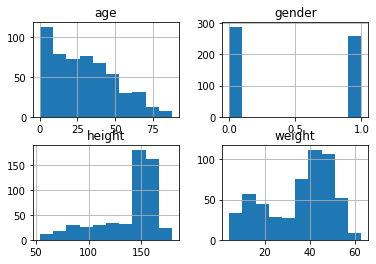

In [3]:
# Give it a quick look
r_ = data.hist()

# Regression

In [5]:
inputs_regression = data[["height","age"]]
targets_regression = data[["weight"]]
targets_regression.columns = ["Actual Weight"]

In [6]:
regression_model = linear_model.Ridge().fit(inputs_regression,targets_regression)

In [7]:
regression_predictions = pd.DataFrame(regression_model.predict(inputs_regression))
regression_predictions.columns = ["Predicted Weight"]

In [8]:
# Print RMSE (similar to SSE). How far off predictions are on average
np.sqrt(mean_squared_error(regression_predictions, targets_regression))

4.933287857925833

In [9]:
# Show the comparison
pd.concat([targets_regression,regression_predictions], axis=1).head(10)

,Actual Weight,Predicted Weight
0,47.825606,43.633771
1,36.485807,37.870744
2,31.864838,36.447694
3,53.041915,45.031412
4,41.276872,40.039383
5,62.992589,48.087293
6,38.243476,40.970693
7,55.479971,50.139687
8,34.869885,39.756074
9,54.487739,49.582520


Text(0.5,0,'Weight')

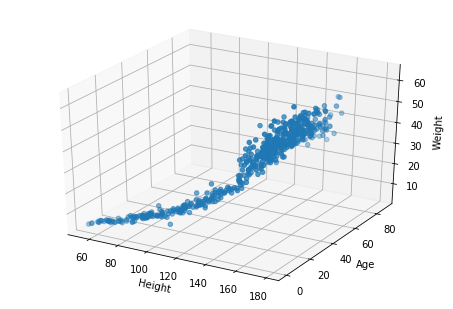

In [10]:
# Plot the input-target space
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(inputs_regression["height"],inputs_regression["age"],
np.ravel(data["weight"]))
ax.set_xlabel('Height')
ax.set_ylabel('Age')
ax.set_zlabel('Weight')

In [11]:
## Predict weight for some specific person, based on their height and age. CHANGE HERE!
test_height = 190 # Convert inches to cm
test_age = 45 # in years
predicted_weight = regression_model.predict([[test_height,test_age]]) *2.20462 # kg to pounds
print("Predicted weight: {} pounds".format(predicted_weight[0][0]))

Predicted weight: 134.60409762881673 pounds


In [12]:
# Scale and export regression data for Simbrain
export_inputs = pd.DataFrame(preprocessing.minmax_scale(inputs_regression))
export_targets = pd.DataFrame(preprocessing.minmax_scale(targets_regression))
export_inputs.to_csv("inputs.csv", header=False, index=False)
export_targets.to_csv("targets.csv", header=False, index=False)

In [13]:
# Value to use for weight from backprop
scale_factor = targets_regression.max()[0] *2.20462 # For output weight
print("Value for weight:{}".forma t(scale_factor))

Value for weight:138.87472156118


In [14]:
# Test your person in Simbrain
print("Scaled height:{} \nScaled age:{}"
.format(test_height/inputs_regression.max()[0],
test_age/inputs_regression.max()[1]))

Scaled height:1.061037583068074 
Scaled age:0.5113636363636364


# Classifier

In [15]:
inputs_classification = data[["height","weight"]]
targets_classification = data[["gender"]]
targets_classification.columns = ["Actual Gender"]

In [16]:
classifer_model = svm.SVC(kernel = 'linear', C = 1.0)

In [17]:
classifer_model.fit(inputs_classification, np.ravel(targets_classification))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
classification_predictions = pd.DataFrame(classifer_model.predict(inputs_classification))
classification_predictions.columns = ["Predicted Gender"]

In [19]:
# Compare values
pd.concat([targets_classification,classification_predictions], axis=1).head(10)

,Actual Gender,Predicted Gender
0,1,1
1,0,0
2,0,0
3,1,1
4,0,1
5,1,1
6,0,0
7,1,1
8,0,0
9,1,1


Text(0,0.5,'weight')

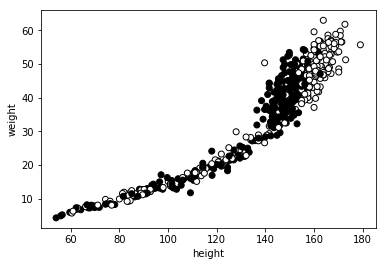

In [20]:
# Plot the two categories in the input space
plt.scatter(inputs_classification["height"],inputs_classification["weight"],
c = np.ravel(targets_classification), cmap="bone", edgecolors='black')
plt.xlabel("height")
plt.ylabel("weight")

In [21]:
# Predict a person's gender from height and weight. CHANGE HERE!
test_height = 81 *2.54 # Convert inches to cm
test_weight = 215 / 2.20462 # pounds to kg
print(classifer_model.predict([[test_height,test_weight]])[0])

1
